<a href="https://colab.research.google.com/github/vocaltrainer/pipeline_woo/blob/main/woo_pipeline(%EC%A0%95%ED%98%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
import warnings
warnings.filterwarnings('ignore') #버전문제로 출력시 에러가뜨는것을 막음
%matplotlib inline

# 데이터셋의 출처 무조건 적기

In [62]:
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/잡다/titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.EDA(정형)

##0) 데이터 훑기

info() : 특성의 자료형 알 수 있음

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Embarked     889 non-null    float64
 6   Initial      891 non-null    int64  
 7   Age_band     891 non-null    int64  
 8   Family_Size  891 non-null    int64  
 9   Alone        891 non-null    int64  
 10  Fare_cat     891 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 76.7 KB


describe() : 기술분석(평균,분산,최대최소..)

In [76]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.841942,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281525,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1) null 값 처리

In [77]:
print(data.shape)
data.isnull().sum()

(891, 14)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
Age_band         0
dtype: int64

age는 채우고 deck는 drop하자

무작정 drop하지말고, 다른 특성으로 grouping한 후, 각 그룹의 평균을 null대신 입력하는 식도 고려

직전값으로 채울 수도 있음

In [65]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    # 정규표현식: .로 끝나는 형태를 다 가져와라

In [66]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [67]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [68]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

###결측치가 null이 아닌 object인경우

예를 들어 0,'-','?','='인 경우 : 이를 NaN으로 바꾼다

In [ ]:
#data.replace('-', np.nan)

###직전 데이터값으로 null 대체

In [ ]:
#df.embark_town.fillna(method='ffill',inplace=True)

###중복데이터 삭제

In [ ]:
#df2 = df.drop_duplicates(subset='Name')

## 2) label별 데이터 분포

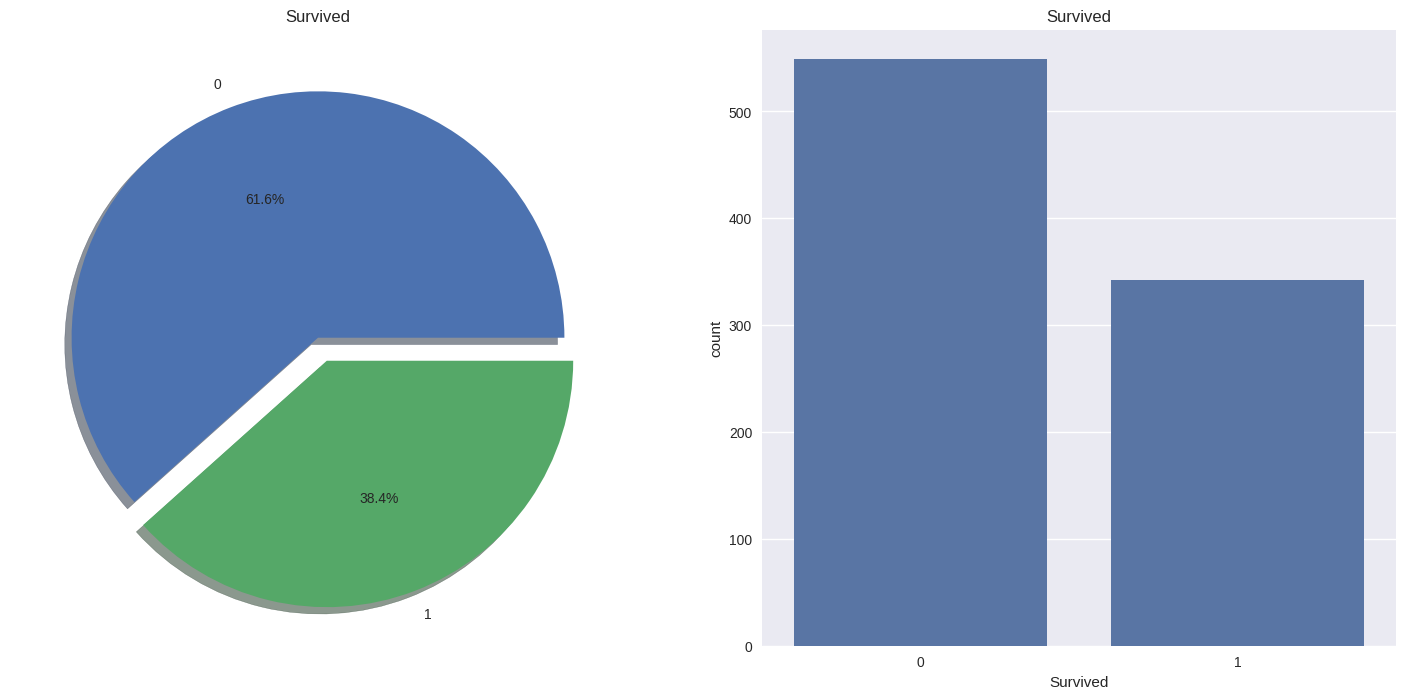

In [41]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],
    autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## 3) Categorical Feature

원핫인코딩등 사용, 무지성 인코딩 x

### crosstab

In [42]:
pd.crosstab(data.Sex,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [43]:
pd.crosstab([data.Embarked,data.Pclass],
            [data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### 변수 2개(categorical, categorical): sns.countplot

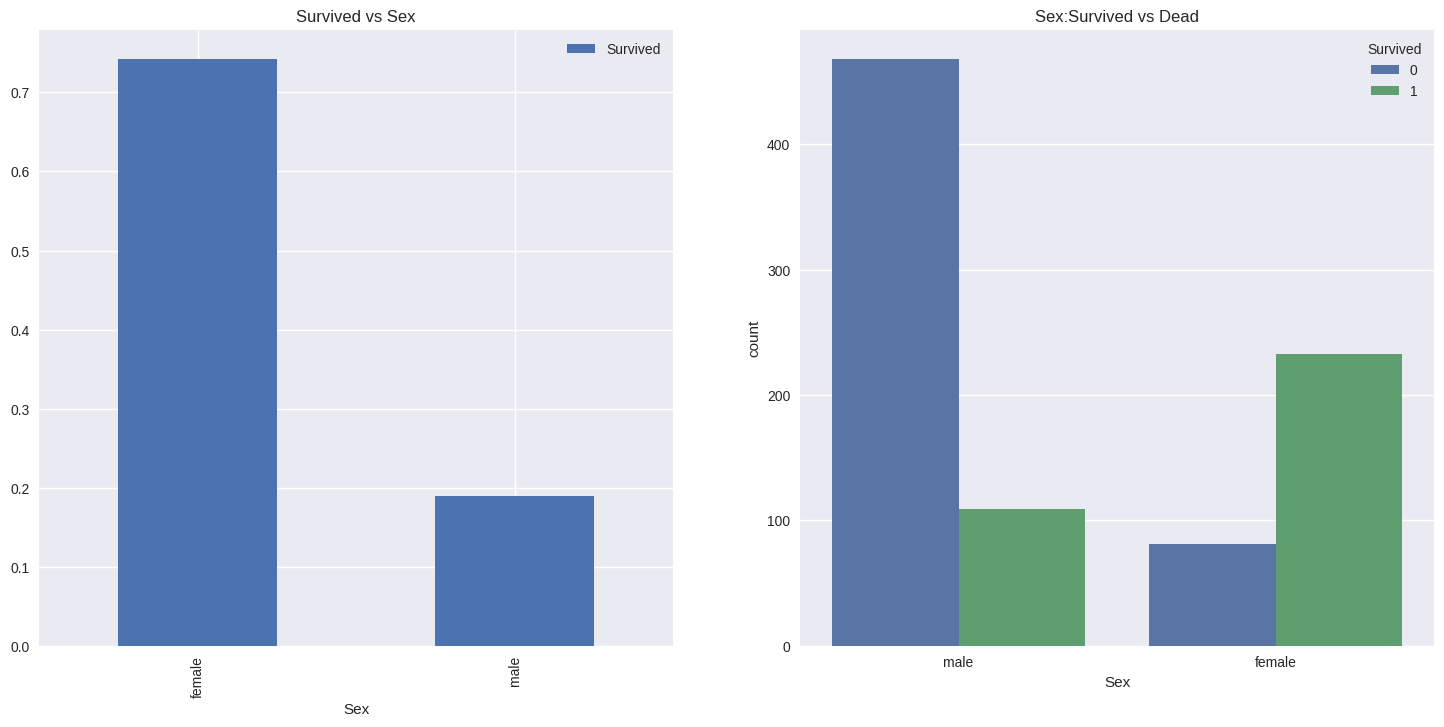

In [44]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## 4) Ordinal Feature

Ordinal Feature(Pclass) : 1,2,3으로 순서가있는 인코딩 가능

### crosstab

In [78]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [45]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### 변수 3개(Ordinal,categorical, categorical): sns.pointplot

<Axes: xlabel='Pclass', ylabel='Survived'>

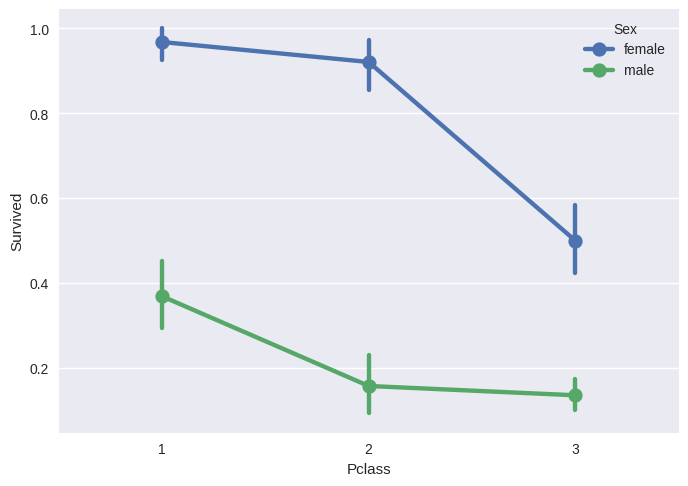

In [46]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=data)

## 5) Continous Feature

사용하는 알고리즘에 따라 Group으로 나누어 Ordinal Feature로 변경할수도있음

최대와 최소를 확인해 outlier 유무체크

mean을 확인해 데이터분포 체크

In [47]:
print('Oldest Passenger was of:{} Years'.format(data['Age'].max()))
print('Youngest Passenger was of:{} Years'.format(data['Age'].min()))
print('Average Passenger was of:{:.2f} Years'.format(data['Age'].mean()))

Oldest Passenger was of:80.0 Years
Youngest Passenger was of:0.42 Years
Average Passenger was of:29.84 Years


### 변수 3개(Continous, categorical, categorical): violinplot

<Axes: xlabel='Pclass', ylabel='Age'>

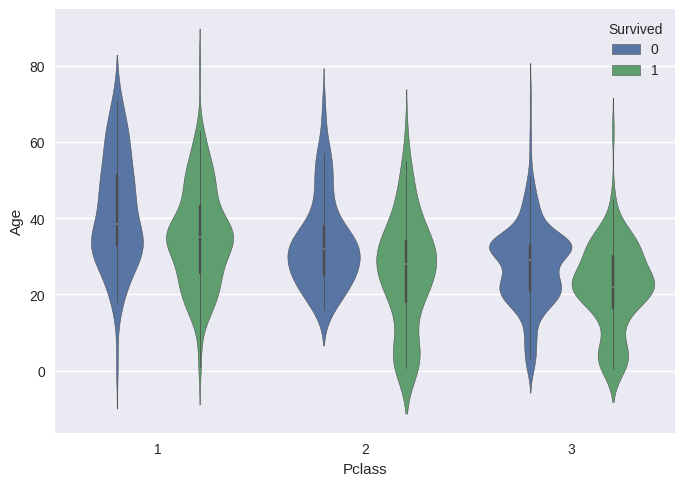

In [48]:
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data)

# 2.Feature Engineering, Data cleaning

##0) 표준화, 정규화


''' 데이터 잘 정리된 것 처럼 보여도 서로 다른 단위가 섞여 있거나 같은 대상을 다른 형식하는 경우가 의외로 많음

동일한 대상을 표현하는 방법에 차이가 있으면, 모델정확도는 현저히 낮아짐.

데이터 포맷을 일관성 있게 표주현하는 표준화 하는 작업이 필요하다.

때문에, 데이터에 대한 설명(출처)가 반드시 필요하다. '''


**ex)데이터가 미국데이터인 경우, 한국에서 쓰는 단위와 맞지않으므로 표준화 해줘야 한다.**


###정규화 1: 최대값으로 나누기

In [60]:
# data2 = data.copy()
# data2.Age = data2.Age /data2.Age.max()
# data2.head()

###정규화 2: MinMaxScaler

In [61]:
# data2 = data.copy()
# 분자
# numerator = data2.Age - data2.Age.min()
# 분모
# denominator = data2.Age.max() - data2.Age.min()

# data2.Age = numerator / denominator
# data2.head()

성능향상이 보장된것은 아님!

## 1) Continous feature -> categorical feature

In [71]:
count, bin_dividers = np.histogram(data.Age, bins=5)
bin_names = [0,1,2,3,4]
data['Age_band'] =pd.cut(x=data.Age,           #데이터배열
                      bins=bin_dividers,           #경계값 리스트
                      labels=bin_names,            #구간의 이름
                      include_lowest=True)         #첫 경계값 포함


In [75]:
data[['Age','Age_band']].head()

,Age,Age_band
0,22.0,1
1,38.0,2
2,26.0,1
3,35.0,2
4,35.0,2


## 2) 2 feature -> 1feature

In [50]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data['Family_Size']==0,'Alone']=1

## 3) Continous feature -> ordinal feature

qcut은 입력한 구간의 수에 따라 데이터 수를 균일하게 분할

ex) 'Fare'는 불균형하게 분포되어있는데, 이를 4개의 구간으로 나눔

In [51]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient('summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [52]:
data['Fare_cat']=0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare']<=513), 'Fare_cat'] = 3

## 4) String -> Numeric

In [53]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

## 5) Feature clean

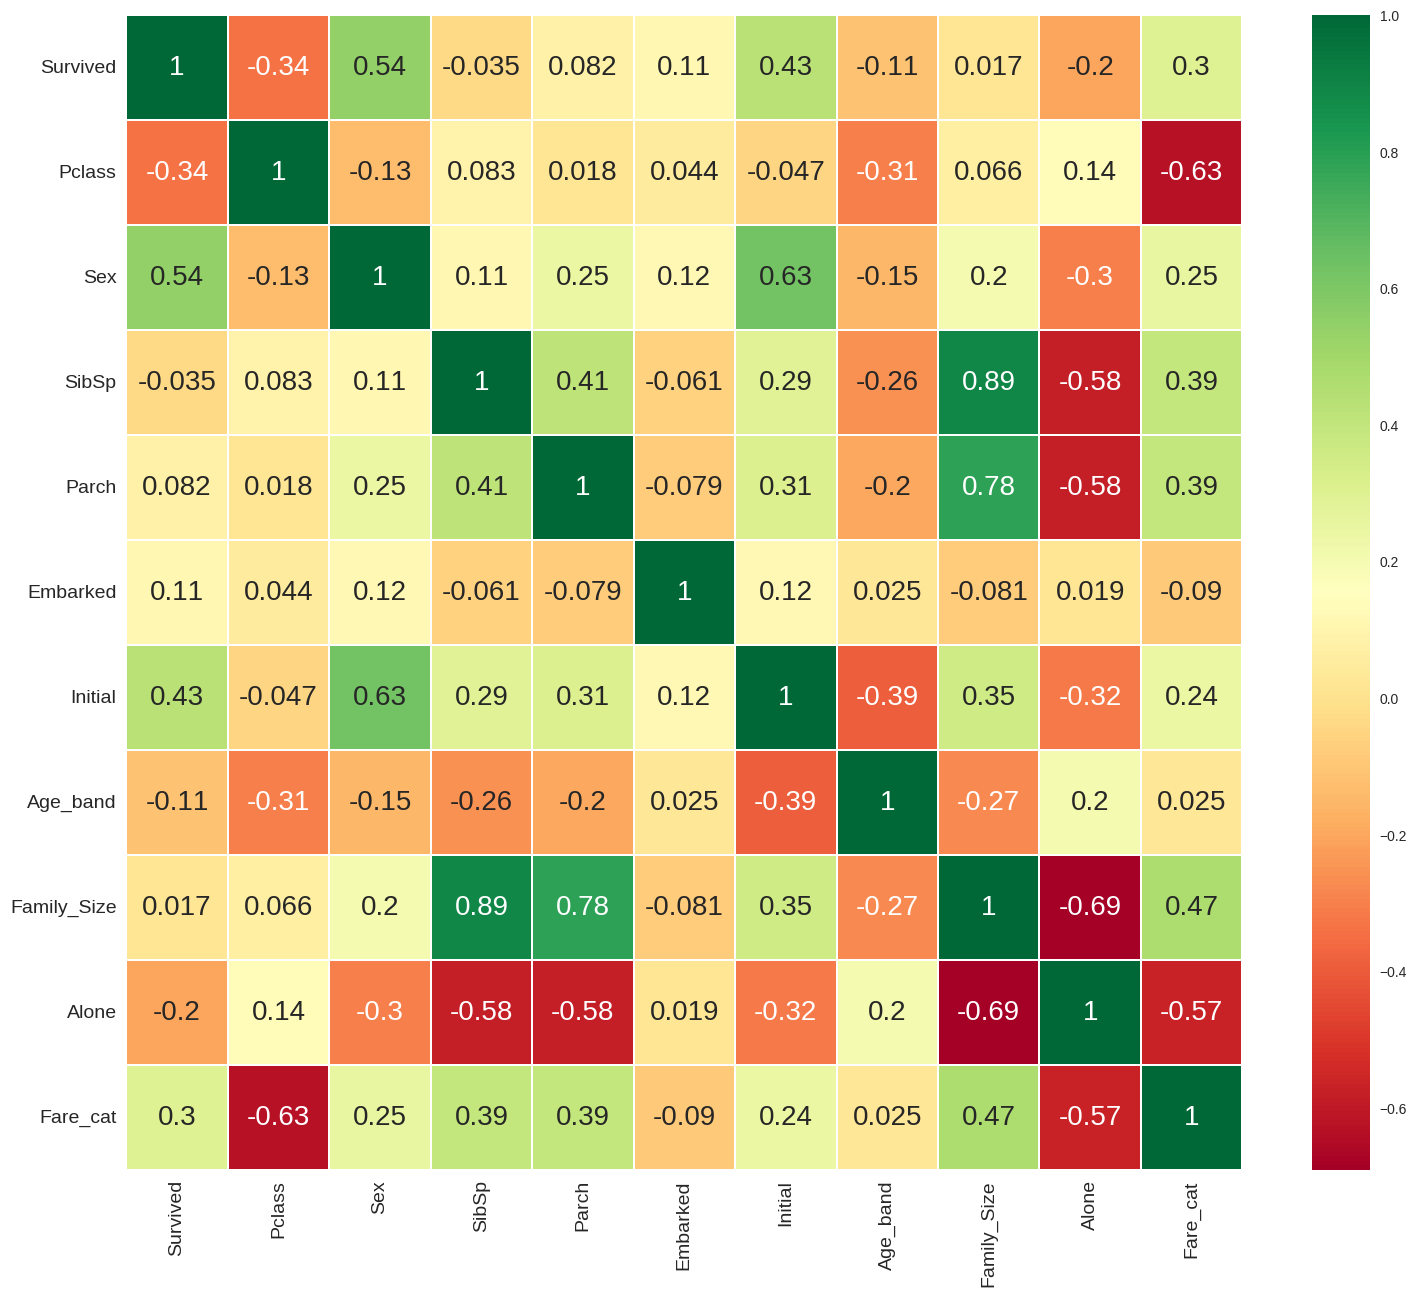

In [54]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

HeatMap 해석:
두 feature가 상당히 높은 상관관계를 가지고 있다면, 둘다 사용할 필요가 없음. 이런 feature는 제거해야함.

불필요한 특징들을 제거하고보니, 상관관계가 있는 feature들이 보이기 시작(0.5까지는 봐줄만 함)

# 3.Predicgtive Modeling

In [55]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

SyntaxError: invalid syntax (<ipython-input-55-d1f59bd5cfdf>, line 1)

stratify : split시 train과 test의 data['Survived']비율을 비슷하게 함.

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## 1) Radial Support Vedctor Machines

In [ ]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,test_Y))

## 2) Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

## 3) Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

## 4) K-Nearest Neighbours

In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

### 파라미터 설정

In [ ]:
a_index=list(range(1,11))
a=[0,0,0,0,0,0,0,0,0,0]
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a[i-1]=metrics.accuracy_score(prediction,test_Y)
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a,'with the max value as '
      ,max(a))

## 5) Gaussian Naive bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

## 6) Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

## 7) 각 모델별 Cross Validation 적용 후 비교

데이터의 불균형, 일반화된 모델을 만들기위해 사용

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree',
             'Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),
        RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

## 8) 상위 2개 모델 하이퍼파라미터 튜닝

SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel' : kernel, 'C' : C, 'gamma' : gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Random Forests

In [ ]:
n_estimators = range(100, 1000, 100)
hyper = { 'n_estimators' : n_estimators }
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

## 9) AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

## 10) XGBoost

In [ ]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

## 11) Confusion Matrix for best Model

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0,learning_rate = 0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt = '2.0f')
plt.show()

## 12) Feature Importance

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()